In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('E:\\Code\\python\\Machine Learning\\Kaggle\\house-prices-advanced-regression-techniques\\train.csv')

In [3]:
train.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
train.columns.unique()

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
train = train.drop(columns = ['Id'], axis = 1)


In [9]:
train2 = pd.read_csv('E:\\Code\\python\\Machine Learning\\Kaggle\\house-prices-advanced-regression-techniques\\train.csv')

In [10]:
train.head(20)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [11]:
numeric_featuer = [col for col in train.columns if train.dtypes[col] != 'object']
numeric_featuer

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [12]:
non_numeric_featuer = [col for col in train.columns if train.dtypes[col] == 'object']
non_numeric_featuer 

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [13]:
numeric_featuer = train[numeric_featuer]

In [14]:
numeric_featuer.head(10)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
5,50,85.0,14115,5,5,1993,1995,0.0,732,0,...,40,30,0,320,0,0,700,10,2009,143000
6,20,75.0,10084,8,5,2004,2005,186.0,1369,0,...,255,57,0,0,0,0,0,8,2007,307000
7,60,NaN,10382,7,6,1973,1973,240.0,859,32,...,235,204,228,0,0,0,350,11,2009,200000
8,50,51.0,6120,7,5,1931,1950,0.0,0,0,...,90,0,205,0,0,0,0,4,2008,129900
9,190,50.0,7420,5,6,1939,1950,0.0,851,0,...,0,4,0,0,0,0,0,1,2008,118000


In [15]:
non_numeric_featuer = train[non_numeric_featuer]

In [16]:
non_numeric_featuer.head(10)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
5,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,Shed,WD,Normal
6,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
7,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,...,Attchd,RFn,TA,TA,Y,NaN,NaN,Shed,WD,Normal
8,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,...,Detchd,Unf,Fa,TA,Y,NaN,NaN,NaN,WD,Abnorml
9,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,...,Attchd,RFn,Gd,TA,Y,NaN,NaN,NaN,WD,Normal


In [17]:
numeric_featuer.isna().sum().sort_values(ascending=False)

LotFrontage      259
GarageYrBlt       81
MasVnrArea         8
OpenPorchSF        0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageCars         0
GarageArea         0
WoodDeckSF         0
MSSubClass         0
BedroomAbvGr       0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
EnclosedPorch      0
FullBath           0
HalfBath           0
BsmtFinSF2         0
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
BsmtFinSF1         0
BsmtUnfSF          0
BsmtHalfBath       0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
SalePrice          0
dtype: int64

<Axes: >

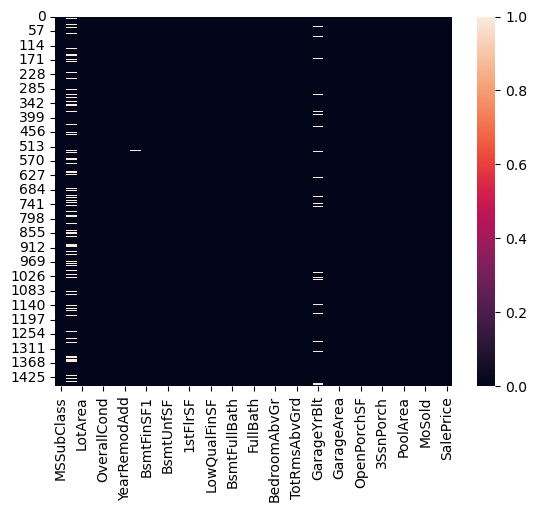

In [18]:
sns.heatmap(numeric_featuer.isna())

In [19]:
numeric_mean = numeric_featuer['LotFrontage'].mean()

In [20]:
numeric_featuer['LotFrontage'] = numeric_featuer['LotFrontage'].fillna(numeric_mean)


C:\Users\Alpha\AppData\Local\Temp\ipykernel_17436\1194449081.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_featuer['LotFrontage'] = numeric_featuer['LotFrontage'].fillna(numeric_mean)


<Axes: >

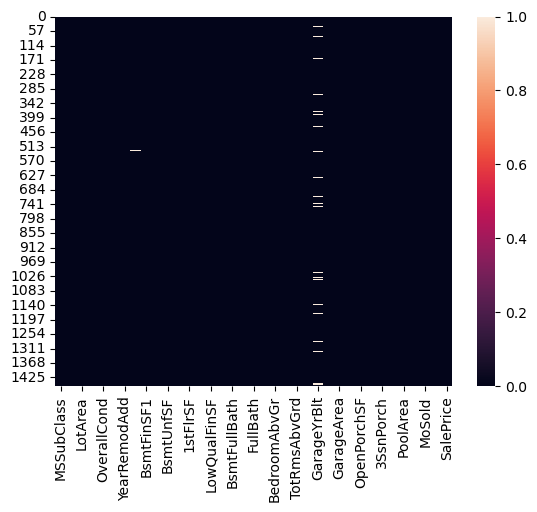

In [21]:
sns.heatmap(numeric_featuer.isna())

In [22]:
numeric_featuer = numeric_featuer.fillna(numeric_featuer.mean())

<Axes: >

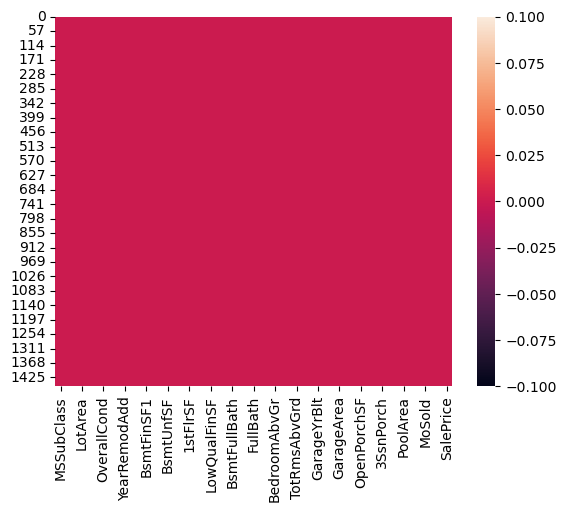

In [23]:
sns.heatmap(numeric_featuer.isna())

C:\Users\Alpha\AppData\Local\Temp\ipykernel_17436\3290984763.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y)
c:\Users\Alpha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Alpha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SalePrice', ylabel='Density'>

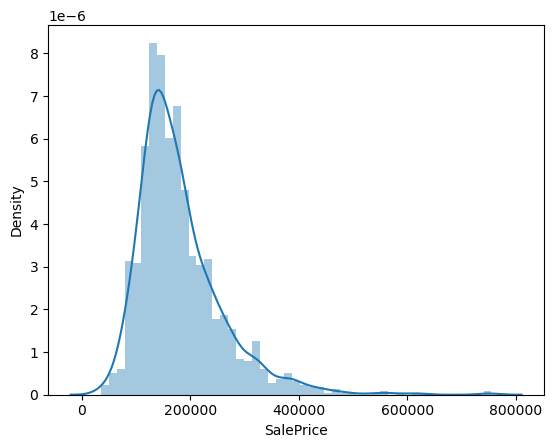

In [24]:
y = train2['SalePrice']
sns.distplot(y)

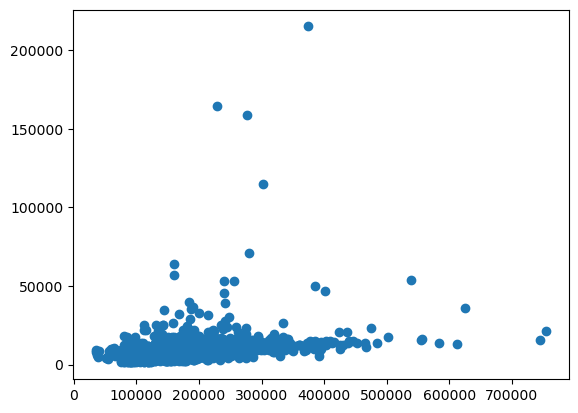

In [25]:
x=numeric_featuer['LotArea']
plt.scatter(y,x)
plt.show()

c:\Users\Alpha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\Users\Alpha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Alpha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Alpha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Alpha\anaconda3\Lib\site-packag

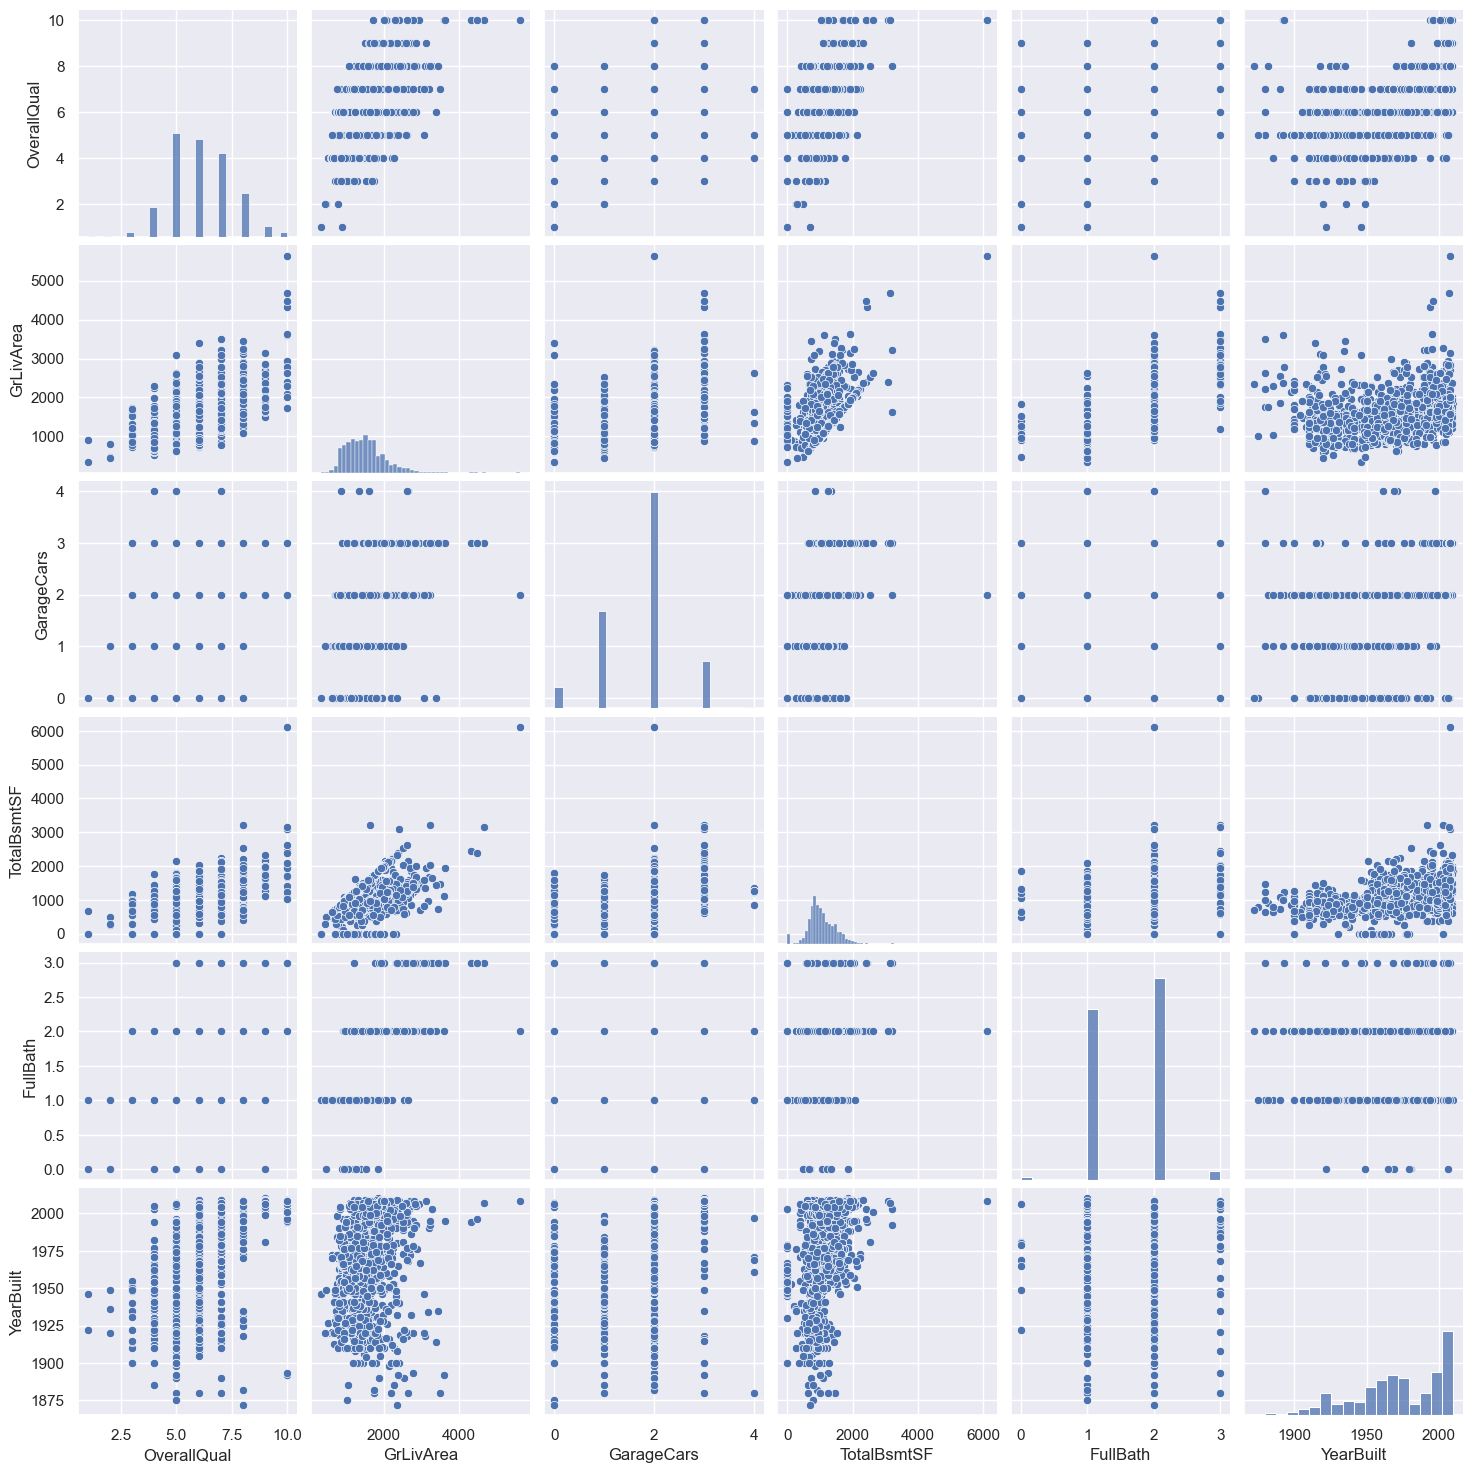

In [26]:
sns.set()
cols = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(numeric_featuer[cols], size = 2.5)
plt.show();

In [27]:
non_numeric_featuer.isna().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
MasVnrType        872
FireplaceQu       690
GarageType         81
GarageCond         81
GarageQual         81
GarageFinish       81
BsmtFinType2       38
BsmtExposure       38
BsmtFinType1       37
BsmtQual           37
BsmtCond           37
Electrical          1
KitchenQual         0
CentralAir          0
Functional          0
HeatingQC           0
Heating             0
PavedDrive          0
SaleType            0
MSZoning            0
Street              0
Condition2          0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
BldgType            0
Foundation          0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
ExterQual           0
ExterCond           0
SaleCondition       0
dtype: int64

In [28]:
drp_non = [col for col in non_numeric_featuer.columns if non_numeric_featuer[col].isna().sum() > 650]

In [29]:
drp_non

['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [30]:
non_numeric_featuer = non_numeric_featuer.drop(columns = drp_non, axis= True )

In [31]:
non_numeric_featuer.isna().sum().sort_values(ascending=False)

GarageCond       81
GarageQual       81
GarageFinish     81
GarageType       81
BsmtExposure     38
BsmtFinType2     38
BsmtCond         37
BsmtFinType1     37
BsmtQual         37
Electrical        1
HeatingQC         0
Heating           0
MSZoning          0
CentralAir        0
Functional        0
PavedDrive        0
SaleType          0
KitchenQual       0
Foundation        0
Street            0
ExterCond         0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
ExterQual         0
SaleCondition     0
dtype: int64

In [32]:
df = pd.concat([numeric_featuer, non_numeric_featuer], axis=True)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1460 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1460 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  1stFlrSF       1460 non-null   int64  
 13  2ndFlrSF       1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  GrLivArea      1460 non-null   int64  
 16  BsmtFullBath   1460 non-null   int64  
 17  BsmtHalfBath   1460 non-null   int64  
 18  FullBath

In [34]:
df.isna().sum().sort_values(ascending = False)

GarageCond       81
GarageQual       81
GarageFinish     81
GarageType       81
BsmtFinType2     38
                 ..
GarageYrBlt       0
Fireplaces        0
TotRmsAbvGrd      0
KitchenAbvGr      0
SaleCondition     0
Length: 74, dtype: int64

In [35]:
df = df.dropna()

In [36]:
df.isna().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
                ..
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
Length: 74, dtype: int64

In [37]:
df.head(30)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,60,65.000000,8450,7,5,2003,2003,196.0,706,0,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,20,80.000000,9600,6,8,1976,1976,0.0,978,0,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,60,68.000000,11250,7,5,2001,2002,162.0,486,0,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,70,60.000000,9550,7,5,1915,1970,0.0,216,0,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,60,84.000000,14260,8,5,2000,2000,350.0,655,0,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
5,50,85.000000,14115,5,5,1993,1995,0.0,732,0,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
6,20,75.000000,10084,8,5,2004,2005,186.0,1369,0,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
7,60,70.049958,10382,7,6,1973,1973,240.0,859,32,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
8,50,51.000000,6120,7,5,1931,1950,0.0,0,0,...,FuseF,TA,Min1,Detchd,Unf,Fa,TA,Y,WD,Abnorml
9,190,50.000000,7420,5,6,1939,1950,0.0,851,0,...,SBrkr,TA,Typ,Attchd,RFn,Gd,TA,Y,WD,Normal


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1346 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1346 non-null   int64  
 1   LotFrontage    1346 non-null   float64
 2   LotArea        1346 non-null   int64  
 3   OverallQual    1346 non-null   int64  
 4   OverallCond    1346 non-null   int64  
 5   YearBuilt      1346 non-null   int64  
 6   YearRemodAdd   1346 non-null   int64  
 7   MasVnrArea     1346 non-null   float64
 8   BsmtFinSF1     1346 non-null   int64  
 9   BsmtFinSF2     1346 non-null   int64  
 10  BsmtUnfSF      1346 non-null   int64  
 11  TotalBsmtSF    1346 non-null   int64  
 12  1stFlrSF       1346 non-null   int64  
 13  2ndFlrSF       1346 non-null   int64  
 14  LowQualFinSF   1346 non-null   int64  
 15  GrLivArea      1346 non-null   int64  
 16  BsmtFullBath   1346 non-null   int64  
 17  BsmtHalfBath   1346 non-null   int64  
 18  FullBath     

In [39]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000,...,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000
mean,56.084695,70.644346,10715.472511,6.225854,5.592125,1973.182021,1985.761516,110.320566,465.913076,48.925706,...,99.168648,48.066865,21.286033,3.564636,16.336553,2.992571,42.677563,6.335810,2007.806092,187057.309807
std,41.214069,22.150193,10325.702028,1.326129,1.078025,29.567218,20.286616,185.052720,459.482069,165.744795,...,127.473653,65.587820,60.877529,30.135862,57.892482,41.836999,506.553810,2.703737,1.329782,79062.790355
min,20.000000,21.000000,1300.000000,2.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,35311.000000
25%,20.000000,60.000000,7750.000000,5.000000,5.000000,1956.000000,1968.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,135000.000000
50%,50.000000,70.049958,9600.000000,6.000000,5.000000,1976.000000,1995.000000,0.000000,415.500000,0.000000,...,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,169500.000000
75%,70.000000,80.000000,11760.750000,7.000000,6.000000,2001.750000,2004.000000,173.500000,735.000000,0.000000,...,174.500000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,220000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [40]:
df[non_numeric_featuer.columns]

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,SBrkr,TA,Min1,Attchd,Unf,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,FuseA,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1346 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1346 non-null   int64  
 1   LotFrontage    1346 non-null   float64
 2   LotArea        1346 non-null   int64  
 3   OverallQual    1346 non-null   int64  
 4   OverallCond    1346 non-null   int64  
 5   YearBuilt      1346 non-null   int64  
 6   YearRemodAdd   1346 non-null   int64  
 7   MasVnrArea     1346 non-null   float64
 8   BsmtFinSF1     1346 non-null   int64  
 9   BsmtFinSF2     1346 non-null   int64  
 10  BsmtUnfSF      1346 non-null   int64  
 11  TotalBsmtSF    1346 non-null   int64  
 12  1stFlrSF       1346 non-null   int64  
 13  2ndFlrSF       1346 non-null   int64  
 14  LowQualFinSF   1346 non-null   int64  
 15  GrLivArea      1346 non-null   int64  
 16  BsmtFullBath   1346 non-null   int64  
 17  BsmtHalfBath   1346 non-null   int64  
 18  FullBath     

In [42]:
from sklearn.preprocessing import OrdinalEncoder

encodecolumn = df[non_numeric_featuer.columns]

encoder = OrdinalEncoder().set_output(transform="pandas")
encodecolumn  = encoder.fit_transform(encodecolumn )
encodecolumn 

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,3.0,1.0,3.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,...,4.0,2.0,6.0,1.0,1.0,4.0,4.0,2.0,8.0,4.0
1,3.0,1.0,3.0,3.0,0.0,2.0,0.0,24.0,1.0,2.0,...,4.0,3.0,6.0,1.0,1.0,4.0,4.0,2.0,8.0,4.0
2,3.0,1.0,0.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,...,4.0,2.0,6.0,1.0,1.0,4.0,4.0,2.0,8.0,4.0
3,3.0,1.0,0.0,3.0,0.0,0.0,0.0,6.0,2.0,2.0,...,4.0,2.0,6.0,5.0,2.0,4.0,4.0,2.0,8.0,0.0
4,3.0,1.0,0.0,3.0,0.0,2.0,0.0,15.0,2.0,2.0,...,4.0,2.0,6.0,1.0,1.0,4.0,4.0,2.0,8.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3.0,1.0,3.0,3.0,0.0,4.0,0.0,8.0,2.0,2.0,...,4.0,3.0,6.0,1.0,1.0,4.0,4.0,2.0,8.0,4.0
1456,3.0,1.0,3.0,3.0,0.0,4.0,0.0,14.0,2.0,2.0,...,4.0,3.0,2.0,1.0,2.0,4.0,4.0,2.0,8.0,4.0
1457,3.0,1.0,3.0,3.0,0.0,4.0,0.0,6.0,2.0,2.0,...,4.0,2.0,6.0,1.0,1.0,4.0,4.0,2.0,8.0,4.0
1458,3.0,1.0,3.0,3.0,0.0,4.0,0.0,12.0,2.0,2.0,...,0.0,2.0,6.0,1.0,2.0,4.0,4.0,2.0,8.0,4.0


In [43]:
encodecolumn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1346 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1346 non-null   float64
 1   Street         1346 non-null   float64
 2   LotShape       1346 non-null   float64
 3   LandContour    1346 non-null   float64
 4   Utilities      1346 non-null   float64
 5   LotConfig      1346 non-null   float64
 6   LandSlope      1346 non-null   float64
 7   Neighborhood   1346 non-null   float64
 8   Condition1     1346 non-null   float64
 9   Condition2     1346 non-null   float64
 10  BldgType       1346 non-null   float64
 11  HouseStyle     1346 non-null   float64
 12  RoofStyle      1346 non-null   float64
 13  RoofMatl       1346 non-null   float64
 14  Exterior1st    1346 non-null   float64
 15  Exterior2nd    1346 non-null   float64
 16  ExterQual      1346 non-null   float64
 17  ExterCond      1346 non-null   float64
 18  Foundation   

In [44]:
df = pd.concat([encodecolumn,numeric_featuer], axis=True)

In [45]:
df.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,3.0,1.0,3.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,...,0,61,0,0,0,0,0,2,2008,208500
1,3.0,1.0,3.0,3.0,0.0,2.0,0.0,24.0,1.0,2.0,...,298,0,0,0,0,0,0,5,2007,181500
2,3.0,1.0,0.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,...,0,42,0,0,0,0,0,9,2008,223500
3,3.0,1.0,0.0,3.0,0.0,0.0,0.0,6.0,2.0,2.0,...,0,35,272,0,0,0,0,2,2006,140000
4,3.0,1.0,0.0,3.0,0.0,2.0,0.0,15.0,2.0,2.0,...,192,84,0,0,0,0,0,12,2008,250000


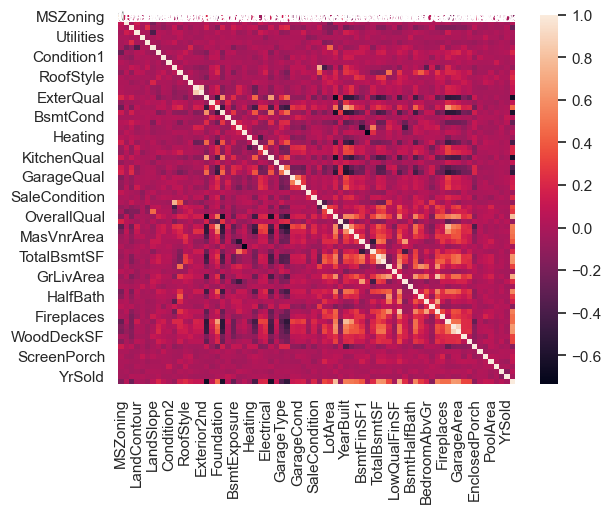

In [46]:
dataplot = sns.heatmap(df.corr(), annot=True) 

In [47]:
df = df.dropna()

In [48]:
df.isna().sum()

MSZoning       0
Street         0
LotShape       0
LandContour    0
Utilities      0
              ..
PoolArea       0
MiscVal        0
MoSold         0
YrSold         0
SalePrice      0
Length: 74, dtype: int64

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1346 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1346 non-null   float64
 1   Street         1346 non-null   float64
 2   LotShape       1346 non-null   float64
 3   LandContour    1346 non-null   float64
 4   Utilities      1346 non-null   float64
 5   LotConfig      1346 non-null   float64
 6   LandSlope      1346 non-null   float64
 7   Neighborhood   1346 non-null   float64
 8   Condition1     1346 non-null   float64
 9   Condition2     1346 non-null   float64
 10  BldgType       1346 non-null   float64
 11  HouseStyle     1346 non-null   float64
 12  RoofStyle      1346 non-null   float64
 13  RoofMatl       1346 non-null   float64
 14  Exterior1st    1346 non-null   float64
 15  Exterior2nd    1346 non-null   float64
 16  ExterQual      1346 non-null   float64
 17  ExterCond      1346 non-null   float64
 18  Foundation   

In [50]:
train = df.iloc[:,:-1]
train

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,3.0,1.0,3.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,...,548,0,61,0,0,0,0,0,2,2008
1,3.0,1.0,3.0,3.0,0.0,2.0,0.0,24.0,1.0,2.0,...,460,298,0,0,0,0,0,0,5,2007
2,3.0,1.0,0.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,...,608,0,42,0,0,0,0,0,9,2008
3,3.0,1.0,0.0,3.0,0.0,0.0,0.0,6.0,2.0,2.0,...,642,0,35,272,0,0,0,0,2,2006
4,3.0,1.0,0.0,3.0,0.0,2.0,0.0,15.0,2.0,2.0,...,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3.0,1.0,3.0,3.0,0.0,4.0,0.0,8.0,2.0,2.0,...,460,0,40,0,0,0,0,0,8,2007
1456,3.0,1.0,3.0,3.0,0.0,4.0,0.0,14.0,2.0,2.0,...,500,349,0,0,0,0,0,0,2,2010
1457,3.0,1.0,3.0,3.0,0.0,4.0,0.0,6.0,2.0,2.0,...,252,0,60,0,0,0,0,2500,5,2010
1458,3.0,1.0,3.0,3.0,0.0,4.0,0.0,12.0,2.0,2.0,...,240,366,0,112,0,0,0,0,4,2010


In [51]:
target = df.iloc[:,-1]


In [52]:
target

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1346, dtype: int64

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.20, random_state=42)

In [54]:
X_train.shape

(1076, 73)

In [56]:
pip install xgboost 

   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 495.5 kB/s eta 0:03:22
   ---------------------------------------- 0.1/99.8 MB 1.1 MB/s eta 0:01:32
   ---------------------------------------- 0.2/99.8 MB 1.5 MB/s eta 0:01:05
   ---------------------------------------- 0.4/99.8 MB 2.2 MB/s eta 0:00:46
   ---------------------------------------- 0.5/99.8 MB 1.8 MB/s eta 0:00:54
   ---------------------------------------- 0.5/99.8 MB 1.8 MB/s eta 0:00:54
   ---------------------------------------- 0.5/99.8 MB 1.8 MB/s eta 0:00:54
   ---------------------------------------- 0.5/99.8 MB 1.8 MB/s eta 0:00:54
   ---------------------------------------- 0.5/99.8 MB 1.2 MB/s eta 0:01:22
   ---------------------------------------- 0.6/99.8 MB 1.3 MB/s eta 0:01:17
   ---------------------------------------- 0.7/99.8 MB 1.3 MB/s eta 0:01:18
   --------

In [57]:
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error

In [58]:
model = XGBRegressor(n_estimators=100, max_depth=4, learning_rate=0.25)


model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.25, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [60]:
predictions = model.predict(X_test)
np.sqrt(mean_squared_error(np.log(y_test), np.log(predictions)))

0.14705714430076047